In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mq135_under20 = {'x': [-9.244186046511626, -6.918604651162788, -4.59302325581395, -2.2093023255813904, -0.05813953488371837, 2.325581395348838, 4.418604651162791, 6.744186046511629, 9.534883720930232, 12.325581395348834, 15.116279069767444, 18.139534883720927],
                 'y': [1.6783410138248844, 1.6064516129032251, 1.5262672811059899, 1.4460829493087546, 1.3824884792626715, 1.3133640552995376, 1.2608294930875559, 1.2027649769585236, 1.1419354838709657, 1.0838709677419331, 1.0396313364055274, 1.011981566820274]}
MQ135_under20_df = pd.DataFrame(mq135_under20)
mq135_over20 = {'x': [21.918604651162802, 25.17441860465116, 28.139534883720934, 31.51162790697675, 34.418604651162795, 37.674418604651166, 40.465116279069775, 43.48837209302326, 46.27906976744187, 48.837209302325604],
                 'y': [0.9815668202764949, 0.9677419354838681, 0.9594470046082921, 0.9511520737327162, 0.9400921658986148, 0.9373271889400894, 0.934562211981564, 0.9290322580645132, 0.920737327188937, 0.912442396313361]}
MQ135_over20_df = pd.DataFrame(mq135_over20)

# Experimental data (replace with your actual data)
temperature_under_20 = MQ135_under20_df['x']  # Temperature data under 20°C
humidity_under_20 = [33] * len(temperature_under_20)  # Humidity data
sensor_output_under_20 = MQ135_under20_df['y']  # Sensor output corresponding to temperature and humidity

temperature_over_20 = MQ135_over20_df['x']  # Temperature data over 20°C
humidity_over_20 = [33] * len(temperature_over_20)  # Humidity data
sensor_output_over_20 = MQ135_over20_df['y']  # Sensor output corresponding to temperature

In [7]:
# X = temperature and humidity data
X_under_20 = np.column_stack((temperature_under_20, humidity_under_20))
X_over_20 = np.column_stack((temperature_over_20, humidity_over_20))

# Y = sensor output data
Y_under_20 = sensor_output_under_20
Y_over_20 = sensor_output_over_20


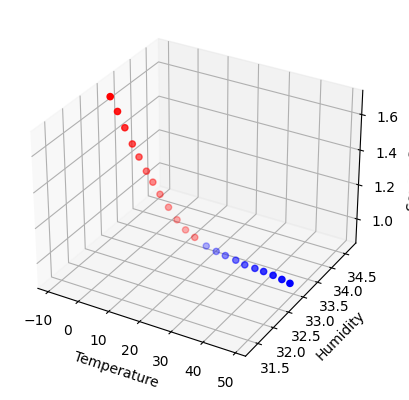

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(temperature_under_20, humidity_under_20, sensor_output_under_20, c='r', marker='o')
ax.scatter(temperature_over_20, humidity_over_20, sensor_output_over_20, c='b', marker='o')
ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Sensor Output')
plt.show()

Under 20°C:
Slope: [-0.02505452  0.        ]
Intercept: 1.4030024322835695


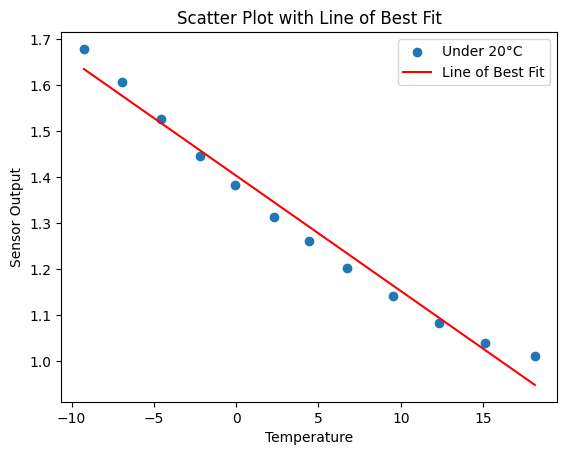

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_under_20, Y_under_20)
print('Under 20°C:')
print('Slope:', model.coef_)
print('Intercept:', model.intercept_)

# model.fit(X_over_20, Y_over_20)
# print('Over 20°C:')
# print('Slope:', model.coef_)
# print('Intercept:', model.intercept_)

slope = model.coef_[0]
intercept = model.intercept_

# Scatter plot of the under_20 data
plt.scatter(mq135_under20['x'], mq135_under20['y'], label='Under 20°C')

# Line plot with the given slope and intercept
x_line = np.linspace(min(mq135_under20['x']), max(mq135_under20['x']), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='red', label='Line of Best Fit')

# Set labels and title
plt.xlabel('Temperature')
plt.ylabel('Sensor Output')
plt.title('Scatter Plot with Line of Best Fit')

# Add legend
plt.legend()

# Show the plot
plt.show()



Over 20°C:
Slope: [-0.00232953  0.        ]
Intercept: 1.0267854884566168


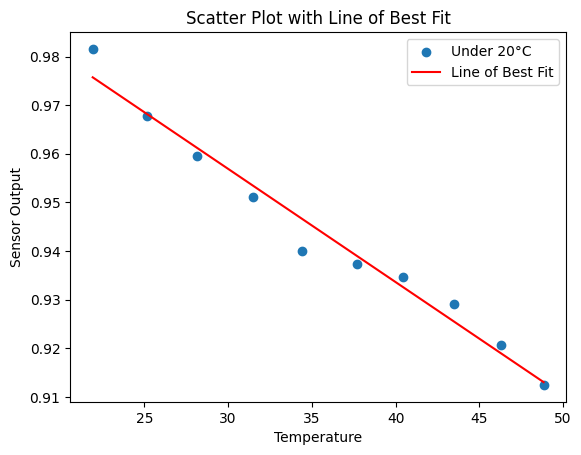

In [19]:
model = LinearRegression()

model.fit(X_over_20, Y_over_20)
print('Over 20°C:')
print('Slope:', model.coef_)
print('Intercept:', model.intercept_)

slope = model.coef_[0]
intercept = model.intercept_

# Scatter plot of the under_20 data
plt.scatter(mq135_over20['x'], mq135_over20['y'], label='Under 20°C')

# Line plot with the given slope and intercept
x_line = np.linspace(min(mq135_over20['x']), max(mq135_over20['x']), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='red', label='Line of Best Fit')

# Set labels and title
plt.xlabel('Temperature')
plt.ylabel('Sensor Output')
plt.title('Scatter Plot with Line of Best Fit')

# Add legend
plt.legend()

# Show the plot
plt.show()